# Cleaning the Cars Dataset

In [ ]:

import pandas as pd
df = pd.read_csv("CarPrice_Assignment.csv")
print(f"the number of columns in this dataset is {df.shape[1]}")
print(f"the number of rows in this dataset is {df.shape[0]}")
print(f"the types of data used in this dataset is {df.info()}")
print(f"the missing values are {df.isnull().sum()}")
#split car names
df['CleanedCarName']=df['CarName'].str.split(' ', expand=True).loc[:, 0]
#replace the wrong car names
df['CleanedCarName']=df['CleanedCarName'].replace({
    "maxda":"mazda",
    "vw":"bmw",
    "vokswagen":"volkswagen",
    "porcshce":"porsche",
    "Nissan":"nissan",
    "toyouta":"toyota"
    
    
})
print(f"cleaned car names are {df['CleanedCarName'].value_counts()}")

the number of columns in this dataset is 26
the number of rows in this dataset is 205
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylin

# Visualisation of the Cars Dataset

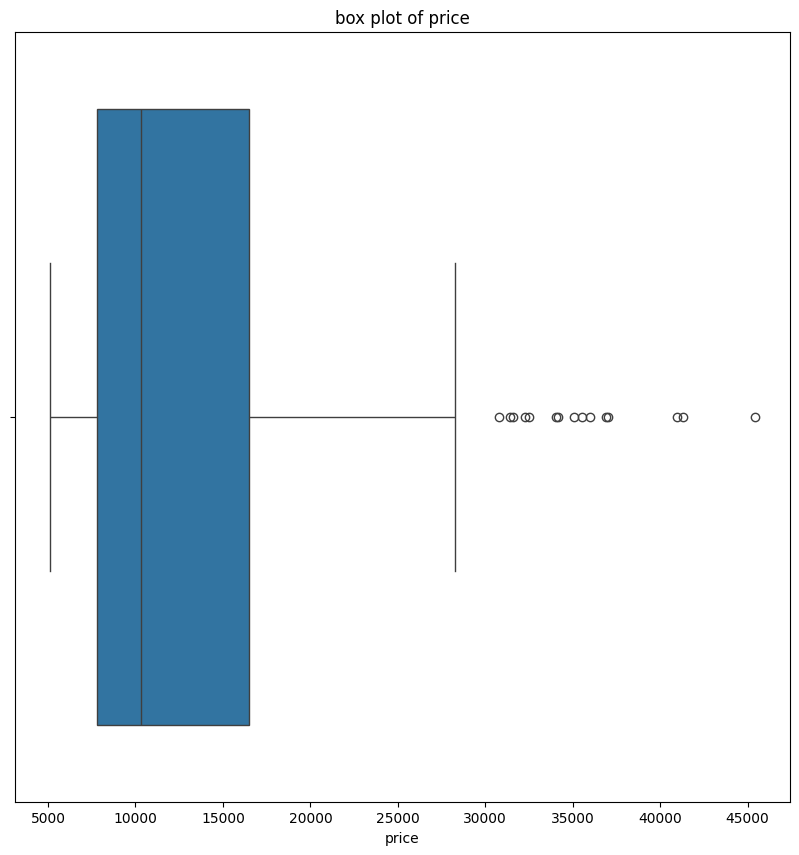

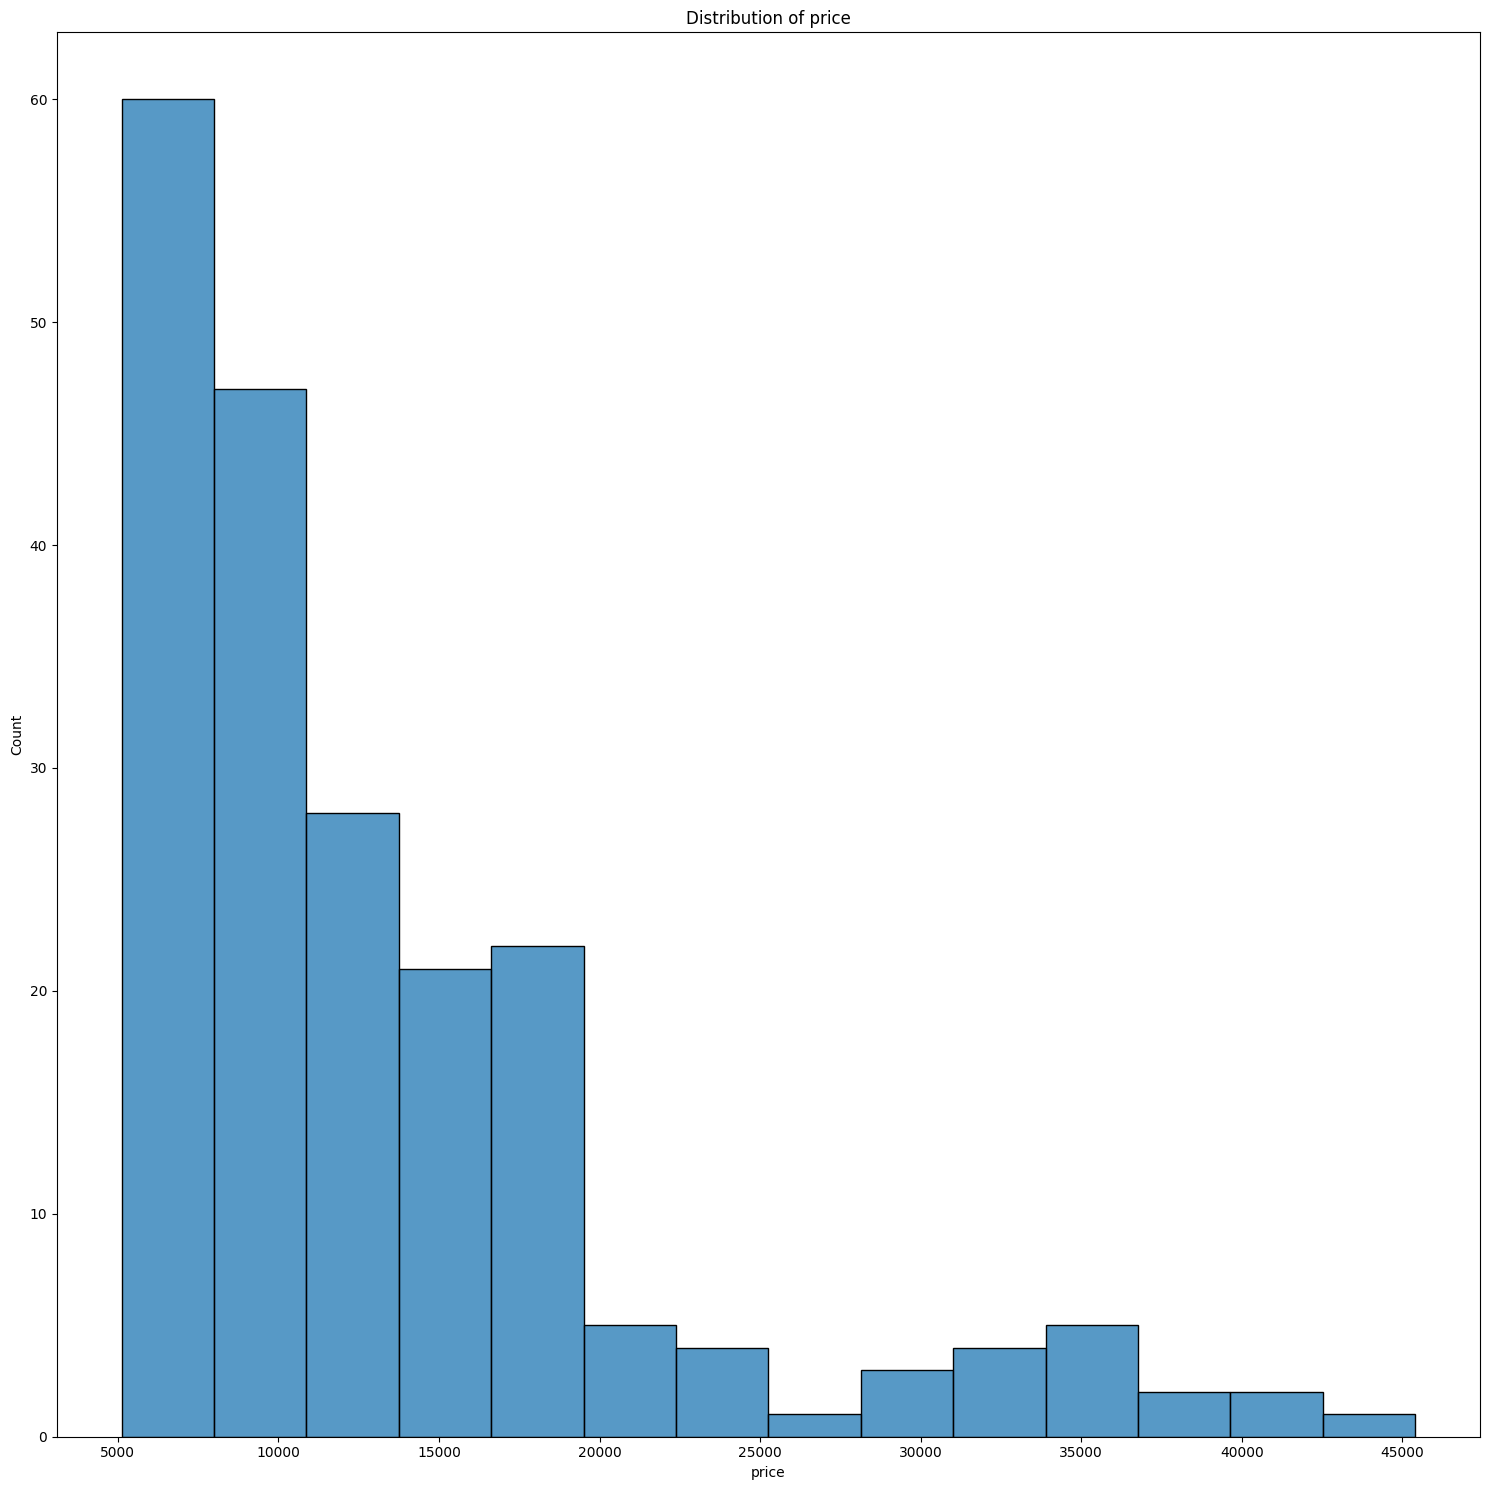

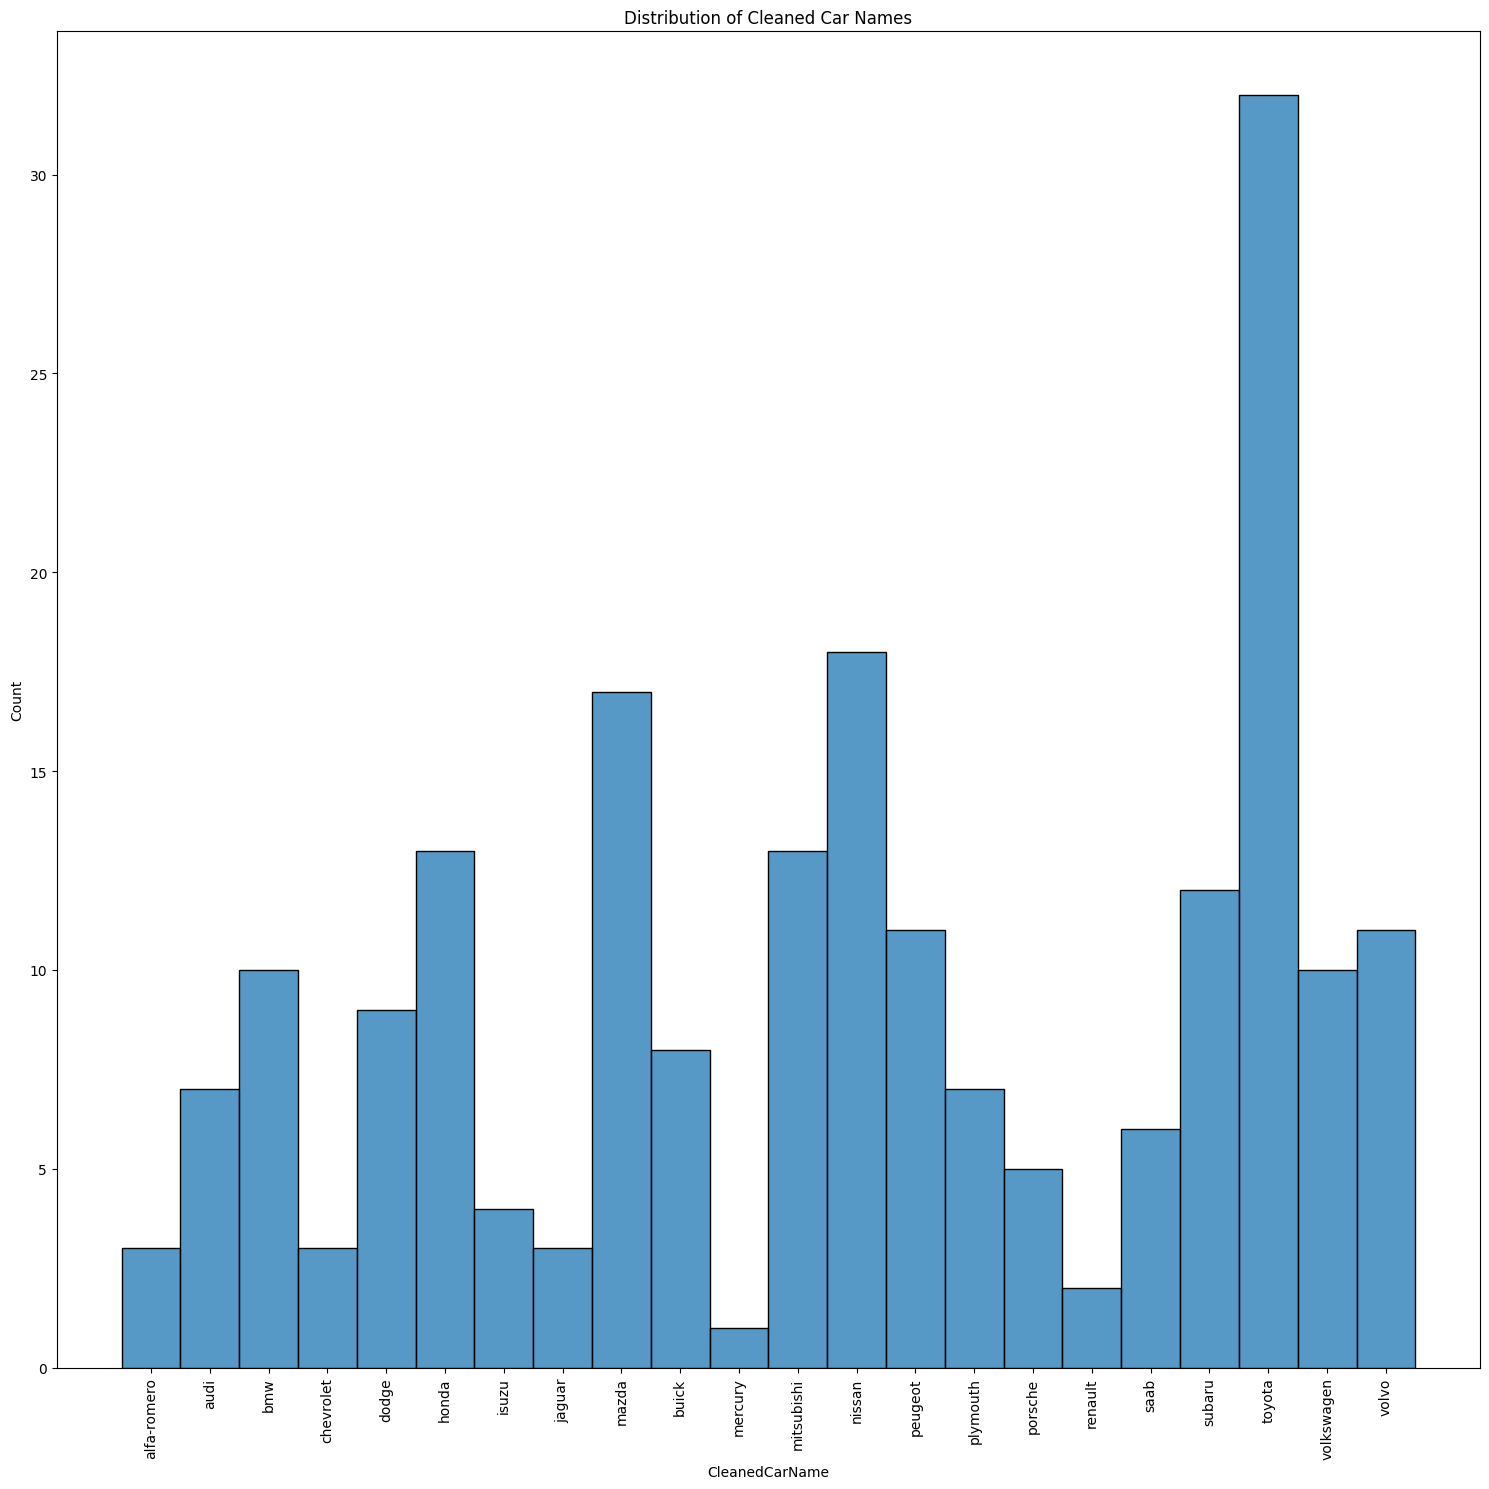

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.boxplot(x=df["price"])
plt.title(f"box plot of price")
plt.show()
#histogramme of the price
plt.figure(figsize=(15,15))
sns.histplot(x=df["price"])
plt.title(f"Distribution of price")
plt.tight_layout()       
plt.show()
#histograme of the cleaned car names
plt.figure(figsize=(15,15))
sns.histplot(x=df["CleanedCarName"])
plt.title(f"Distribution of Cleaned Car Names")
plt.xticks(rotation=90)  
plt.tight_layout()       
plt.show()




# Data Info

<Axes: >

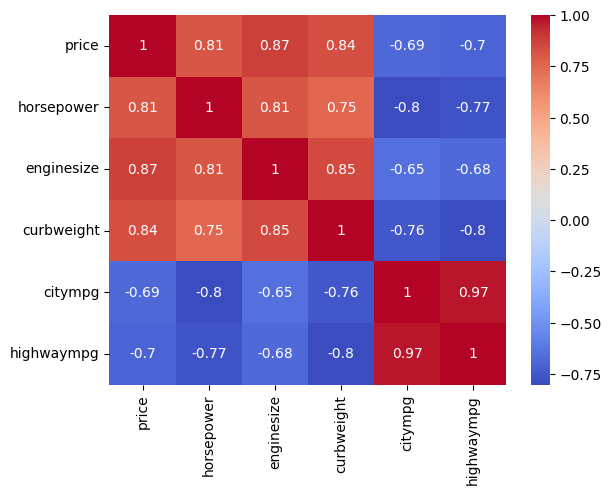

In [37]:
df.describe()
sns.scatterplot(x="horsepower", y="price", data=df)

numeric_cols = ['price', 'horsepower', 'enginesize', 'curbweight', 'citympg', 'highwaympg']
subset_corr = df[numeric_cols].corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(subset_corr, annot=True, cmap="coolwarm")


# Selecting the important features and normalizing the data /Spliting the train and test data/training the model with random forest/calculate the r2 score

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
selected_features = ['enginesize','horsepower','curbweight','citympg','highwaympg']
X_numeric = df[selected_features]
y = df['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")




R² Score: 0.9538
Mean Squared Error: 3648478.65


# Compare the real prices with the predicted prices

In [78]:

y_pred = rf.predict(X_test)

comparison = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})
print(comparison.head(10))


   Actual Price  Predicted Price
0     30760.000     35382.765000
1     17859.167     18684.503333
2      9549.000      9296.860000
3     11850.000     13096.040000
4     28248.000     27785.655000
5      7799.000      7254.934167
6      7788.000      8043.420000
7      9258.000      7963.273333
8     10198.000     11689.314167
9      7775.000      7984.536667


# try some predictions

In [76]:

example_car = pd.DataFrame([[130, 111, 2548, 21, 27],[120, 220, 3000, 20, 15]],
                           columns=['enginesize', 'horsepower', 'curbweight', 'citympg', 'highwaympg'])
example_car_scaled = scaler.transform(example_car)   # apply same scaling

predicted_price = rf.predict(example_car_scaled)
print(f"Predicted Price for car1: ${predicted_price[0]:.2f}")
print (f"predicted Price for car2: ${predicted_price[1]:.2f}")

Predicted Price for car1: $14613.89
predicted Price for car2: $17901.75


# Saving the model

In [77]:
import joblib
joblib.dump(rf, "car_price_predictor.pkl")


['car_price_predictor.pkl']